In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


Reading the Data

In [37]:
df = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")

In [38]:
df = pd.DataFrame(df)

In [39]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [40]:
df.drop(columns = "No",inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

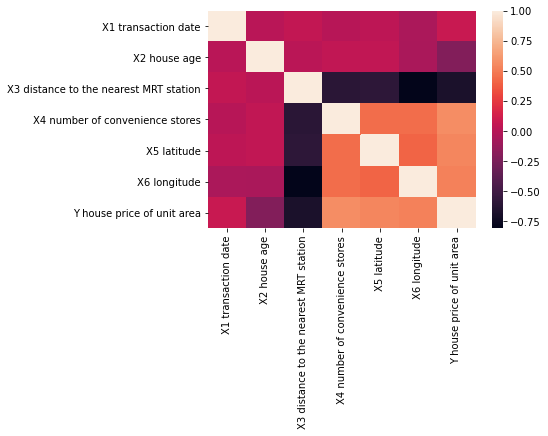

In [42]:
sns.heatmap(df.corr())

In [43]:
df.rename(columns = {"X1 transaction date" : "TransDate","X2 house age":"Age", "X3 distance to the nearest MRT station":"StatDist","X4 number of convenience stores":"No_Stores","X5 latitude":"Latitude","X6 longitude":"Longitude","Y house price of unit area":"Price"} ,inplace = True)

In [44]:
df.head()

,TransDate,Age,StatDist,No_Stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [45]:
df.dtypes

TransDate    float64
Age          float64
StatDist     float64
No_Stores      int64
Latitude     float64
Longitude    float64
Price        float64
dtype: object

In [46]:
df.describe()

,TransDate,Age,StatDist,No_Stores,Latitude,Longitude,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


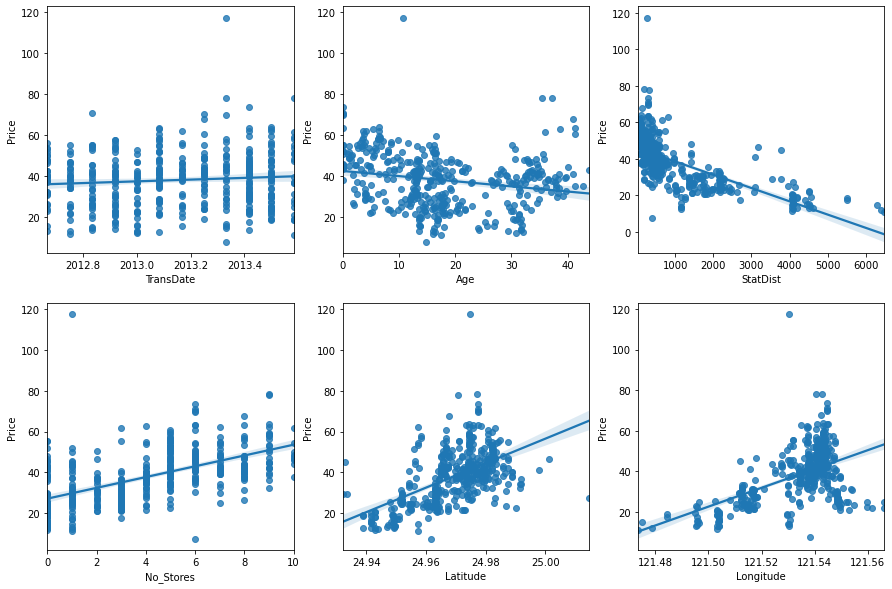

In [47]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.regplot("TransDate","Price",data = df)
plt.subplot(2,3,2)
sns.regplot("Age","Price",data = df)
plt.subplot(2,3,3)
sns.regplot("StatDist","Price",data = df)
plt.subplot(2,3,4)
sns.regplot("No_Stores","Price",data = df)
plt.subplot(2,3,5)
sns.regplot("Latitude","Price",data = df)
plt.subplot(2,3,6)
sns.regplot("Longitude","Price",data = df)


In [48]:
df.head()

,TransDate,Age,StatDist,No_Stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
df.isnull()

,TransDate,Age,StatDist,No_Stores,Latitude,Longitude,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False


In [50]:
X = df[["Age","StatDist","No_Stores","Latitude","Longitude"]]

In [51]:
Y = df[["Price"]]

In [52]:
X = np.asanyarray(X)
Y = np.asanyarray(Y)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)
X_scale

array([[ 1.25562833, -0.79249504,  2.00740743,  1.12542986,  0.44876222],
       [ 0.15708622, -0.61661163,  1.66750286,  0.91244418,  0.40113894],
       [-0.38779067, -0.41401527,  0.30788458,  1.48686011,  0.68818339],
       ...,
       [ 0.09556786, -0.54967846,  0.98769372,  0.82289338,  0.42397202],
       [-0.84478419, -0.77668389,  0.30788458, -0.18475479,  0.4768143 ],
       [-0.98539758, -0.78807071,  1.66750286,  0.42757905,  0.63534112]])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,Y,test_size = 0.12,random_state = 1)


In [55]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.coef_)
print(regr.intercept_)

[[-3.05750314 -5.58507479  3.26350164  3.0587342  -0.42703737]]
[38.20840688]


In [56]:
yhat = regr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.7236516179867912

In [58]:
# We try Polynomial Regression to check if that is any more accurate

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_scale)
X_poly

array([[ 1.        ,  1.25562833, -0.79249504, ...,  1.26659238,
         0.50505041,  0.20138753],
       [ 1.        ,  0.15708622, -0.61661163, ...,  0.83255438,
         0.36601689,  0.16091245],
       [ 1.        , -0.38779067, -0.41401527, ...,  2.210753  ,
         1.02323243,  0.47359638],
       ...,
       [ 1.        ,  0.09556786, -0.54967846, ...,  0.67715352,
         0.34888377,  0.17975228],
       [ 1.        , -0.84478419, -0.77668389, ...,  0.03413433,
        -0.08809373,  0.22735187],
       [ 1.        , -0.98539758, -0.78807071, ...,  0.18282384,
         0.27165855,  0.40365833]])

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,Y,test_size = 0.1,random_state = 1)


In [79]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
yhat2 = lm.predict(X_test)

In [81]:
r2_score(y_test,yhat2)

0.81038198594238